_Link to the data set: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II_
<br>
**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
<br><br>**Tableau vizualizations/dashboard:**<br>
https://public.tableau.com/profile/daria.m2607#!/vizhome/CohortAnalysis_16017438383010/DashboardCohorts

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import warnings
from operator import attrgetter
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Open Excel file and create Data Frames from two sheets of this file

df1 = pd.read_excel('/Users/Daria/Downloads/online_retail_II.xlsx', 
                    dtype={'Customer ID': str,
                          'Invoice': str},
                    sheet_name='Year 2009-2010',
                    parse_dates=['InvoiceDate'], 
                   infer_datetime_format=True)

df2 = pd.read_excel('/Users/Daria/Downloads/online_retail_II.xlsx',
                    dtype={'Customer ID': str,
                          'Invoice': str},
                    sheet_name='Year 2010-2011',
                    parse_dates=['InvoiceDate'], 
                   infer_datetime_format=True)

In [4]:
# Combine two Data Frames into one

df = pd.concat([df1, df2]).reset_index().drop('index', axis=1)

In [5]:
# some of the information in CustomerID field is missing (null)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# drop null values from Data Frame

df.dropna(subset=['Customer ID'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  object        
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 56.6+ MB


In [8]:
# The 'Year2010-2011' sheet has repeated/duplicate information from the 'Year2009-2010' -> 
# drop duplicate rows

df.drop_duplicates(inplace=True)

In [9]:
# check general information about data

df.describe()

,Quantity,Price
count,797885.000000,797885.000000
mean,12.602980,3.702732
std,191.670371,71.392549
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [10]:
# check the min negative number in the 'Quantity' column

df[df.Quantity == -80995]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [11]:
# check the max number in the 'Quantity' column

df[df.Quantity == 80995]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [13]:
df[df['Customer ID'] == 16446]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


Negative numbers in the 'Quantity' column indicate returnes from customers. That also same was noted from the source of this data set: _"If code in 'Invoice' column starts with the letter 'c', it indicates a cancellation"_. For the cohort analysis I exclude these return orders.

In [12]:
df = df[df['Quantity'] > 0].copy()

In [13]:
# checking what are test orders and how many of them Data set have

df[df['StockCode'].str.contains('TEST', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103,United Kingdom


There are not that many test orders in the Data set. Also, with absence of extra information on these orders its fare to keep them and not exclude from the data set.

**Quick exploratory data analysis**

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [15]:
# Find 10 most popular products ordered 

top_10_products = (df.groupby('Description')
                   .size()
                   .reset_index()
                   .rename(columns={0: 'product_counts'})
                   .sort_values('product_counts', ascending=False)
                   .head(10))

In [16]:
top_10_products

,Description,product_counts
5047,WHITE HANGING HEART T-LIGHT HOLDER,5016
3769,REGENCY CAKESTAND 3 TIER,3337
292,ASSORTED COLOUR BIRD ORNAMENT,2692
2392,JUMBO BAG RED RETROSPOT,2641
3155,PARTY BUNTING,2099
2609,LUNCH BAG BLACK SKULL.,2045
3844,REX CASH+CARRY JUMBO SHOPPER,1950
2622,LUNCH BAG SPACEBOY DESIGN,1890
4613,STRAWBERRY CERAMIC TRINKET BOX,1859
2246,HOME BUILDING BLOCK WORD,1852


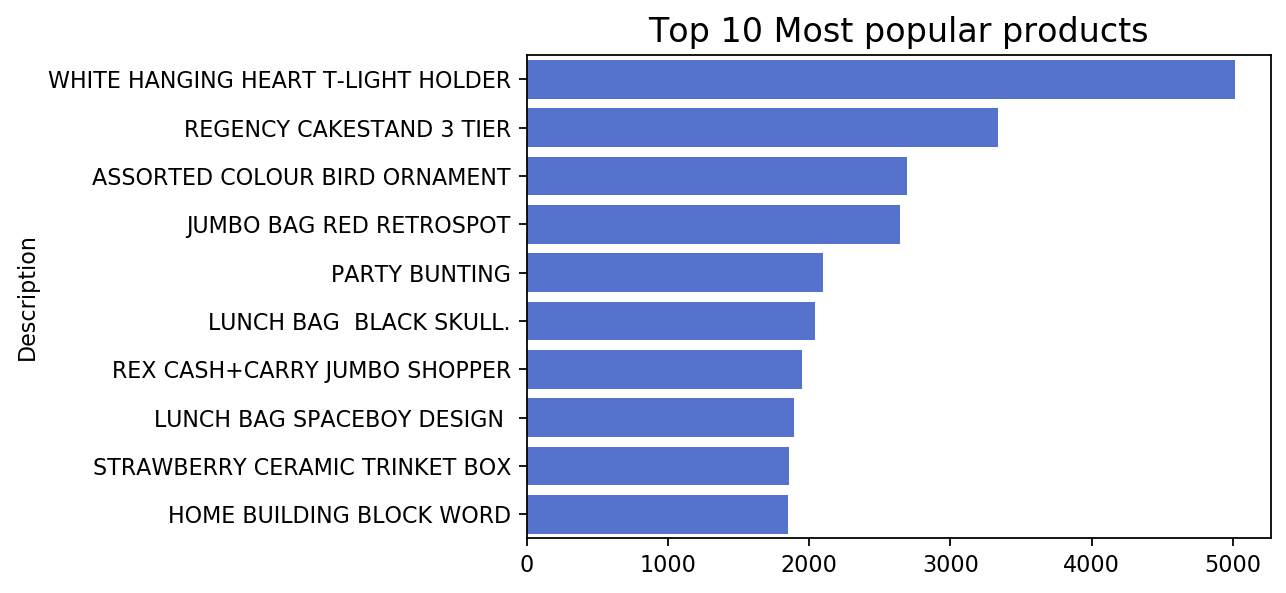

In [17]:
plt.figure(dpi=80)

plt.title('Top 10 Most popular products', fontsize=15)

sns.barplot(data=top_10_products, x='product_counts', y='Description',
            color='royalblue')
plt.xlabel('');

In [18]:
# find number of customers by countries -> Top 5 countries by number of customers

df_country_customers_top_5 = (df.groupby('Country')
                               .agg({'Customer ID': 'nunique'})
                               .rename(columns={'Customer ID': 'number_customers'})
                               .sort_values('number_customers', ascending=False)
                               .reset_index()
                               .head())

In [19]:
df_country_customers_top_5

,Country,number_customers
0,United Kingdom,5353
1,Germany,107
2,France,95
3,Spain,41
4,Belgium,29


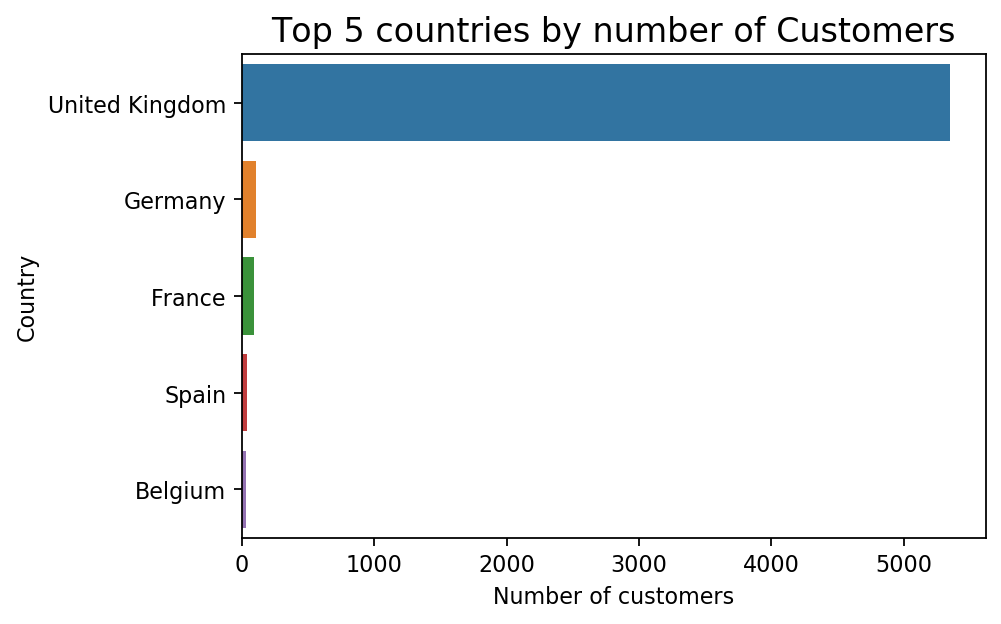

In [21]:
plt.figure(dpi=80)

plt.title('Top 5 countries by number of Customers', fontsize=15)

sns.barplot(data=df_country_customers_top_5, x='number_customers', y='Country')
plt.xlabel('Number of customers');

In [22]:
# Top 10 Countries by purchasing volume

top_10_countries_volume = ((round(df['Country'].value_counts(normalize=True).head(10)*100,1))
                           .reset_index()
                           .rename(columns={'index': 'Country', 'Country': 'Volume_percent'}))

In [23]:
top_10_countries_volume

,Country,Volume_percent
0,United Kingdom,89.9
1,Germany,2.1
2,EIRE,2.0
3,France,1.7
4,Netherlands,0.7
5,Spain,0.5
6,Belgium,0.4
7,Switzerland,0.4
8,Portugal,0.3
9,Australia,0.2


Since the company in the data set is UK-based and registered non-store online retailer almost all of its transactions are in UK.

In [24]:
# find number of customers by countries excluding UK -> Top 5 countries by number of customers

df_country_customers_noUK_top_5 = (df[df['Country'] != 'United Kingdom'].groupby('Country')
                               .agg({'Customer ID': 'nunique'})
                               .rename(columns={'Customer ID': 'number_customers'})
                               .sort_values('number_customers', ascending=False)
                               .reset_index()
                               .head())

In [25]:
df_country_customers_noUK_top_5

,Country,number_customers
0,Germany,107
1,France,95
2,Spain,41
3,Belgium,29
4,Portugal,24


In [26]:
# Create column with monetary Total of each order (position in an Invoice)

df['Total_order'] = df['Quantity'] * df['Price']

In [27]:
# Check Sales by year

sales_year = (df.groupby(df['InvoiceDate'].dt.year)['Total_order']
                     .sum()
                     .reset_index()
                     .rename(columns={'InvoiceDate': 'Year'}))

In [28]:
sales_year

,Year,Total_order
0,2009,6.835040e+05
1,2010,8.374496e+06
2,2011,8.316804e+06


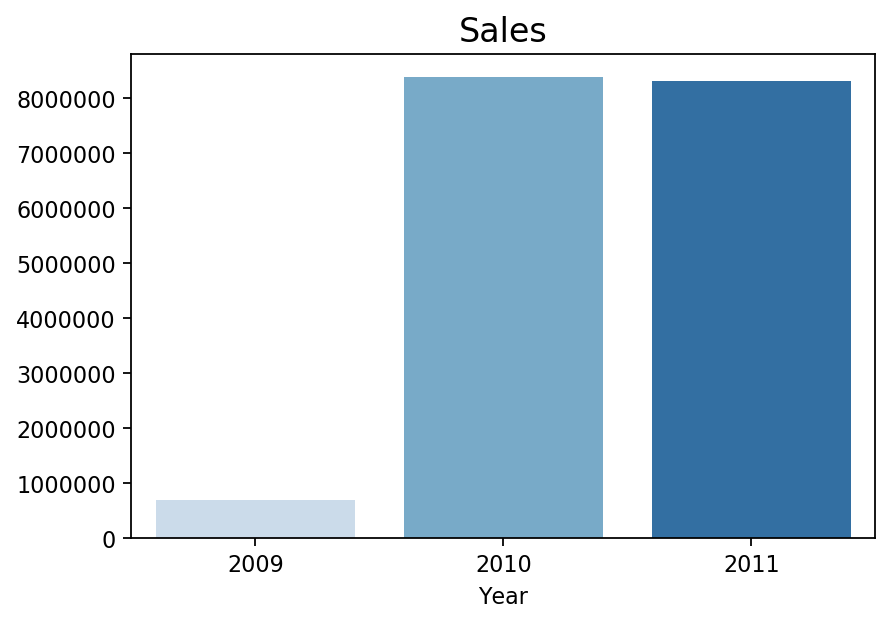

In [30]:
plt.figure(dpi=80)

plt.title('Sales', fontsize=15)

sns.barplot(data=sales_year, x='Year', y='Total_order', palette="Blues");
plt.ylabel("");

In [32]:
# Identify month to which each Invoice belongs

df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [33]:
monthly_sales = (df.groupby([df['InvoiceDate'].dt.year, df['order_month'].dt.month])
                ['Total_order'].sum()
                .reset_index()
                .rename(columns={'InvoiceDate': 'Year'}))

In [34]:
monthly_sales.groupby('order_month', as_index=False)['Total_order'].sum().sort_values('Total_order')

,order_month,Total_order
1,2,950643.876
3,4,1060356.333
0,1,1123903.982
6,7,1188699.071
7,8,1246275.640
4,5,1275188.530
2,3,1291060.231
5,6,1296417.180
11,12,1771135.180
8,9,1779704.153


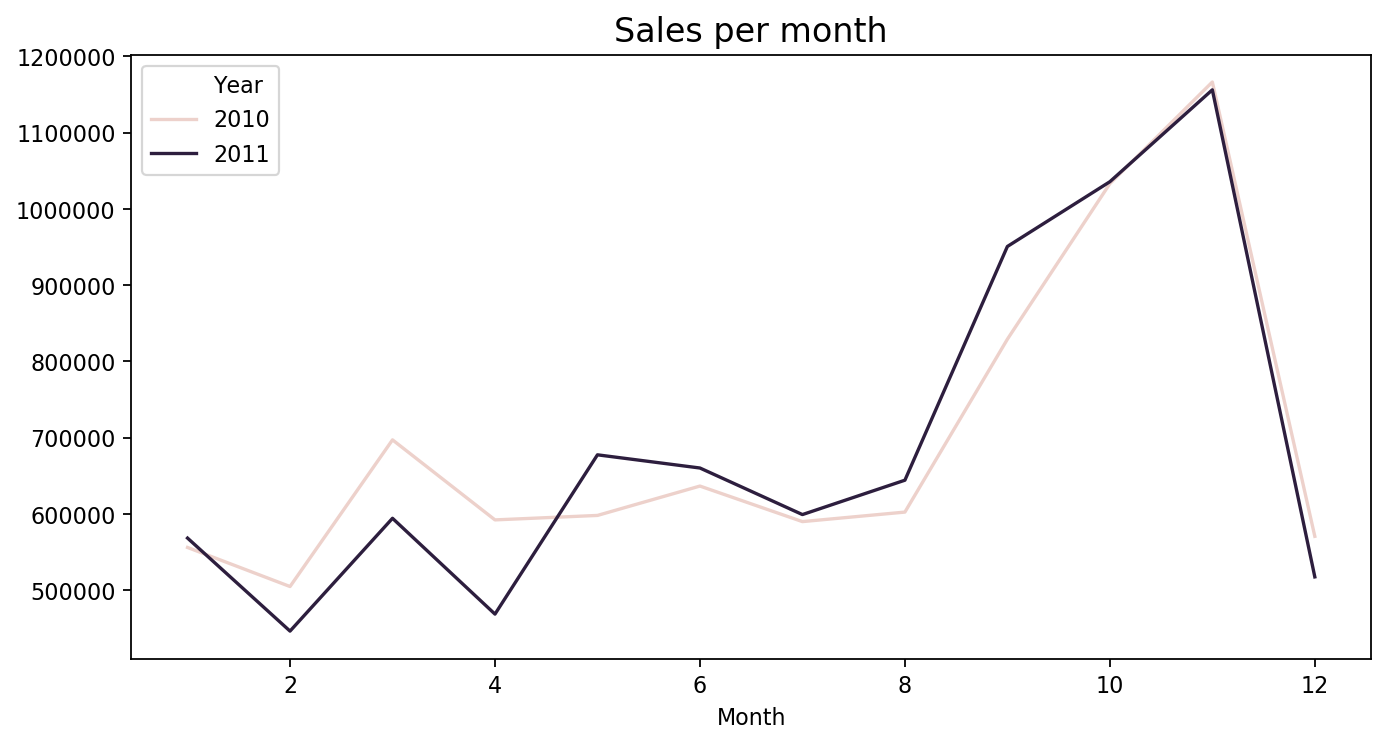

In [35]:
plt.figure(dpi=80, figsize=(10,5))

plt.title('Sales per month', fontsize=15)
sns.lineplot(data=monthly_sales[monthly_sales.Year != 2009], x='order_month', y='Total_order', hue='Year')
plt.xlabel('Month')
plt.ylabel('');

Since the company sells unique all-occasion gifts its sales start to grow from September with November as a peak month - right before Christmas Holidays

In [ ]:
# Check in what part of the day custemers placing their orders in peak months such as Sep - Dec
# and lower months (rest of the months)

In [36]:
test = df.copy()

In [37]:
test['season'] = np.where(test['InvoiceDate'].dt.month > 8, 'high', 'low')

In [40]:
total_invoice_h = (test.groupby(['season', 'order_month', test['InvoiceDate'].dt.hour, 'Invoice'])
                   ['Total_order']
                   .sum().reset_index()
                   .rename(columns={'InvoiceDate': 'hour'}))

In [41]:
n_invoice_h = (total_invoice_h.groupby(['season', 'order_month', 'hour'])
               ['Invoice']
               .count()
               .reset_index()
               .rename(columns={'Invoice': 'n_invoices'}))

In [43]:
avg_n_invoice_h = (n_invoice_h.groupby(['season', 'hour'])
                   ['n_invoices'].mean()
                   .reset_index()
                   .rename(columns={'n_invoices': 'avg_num'}))

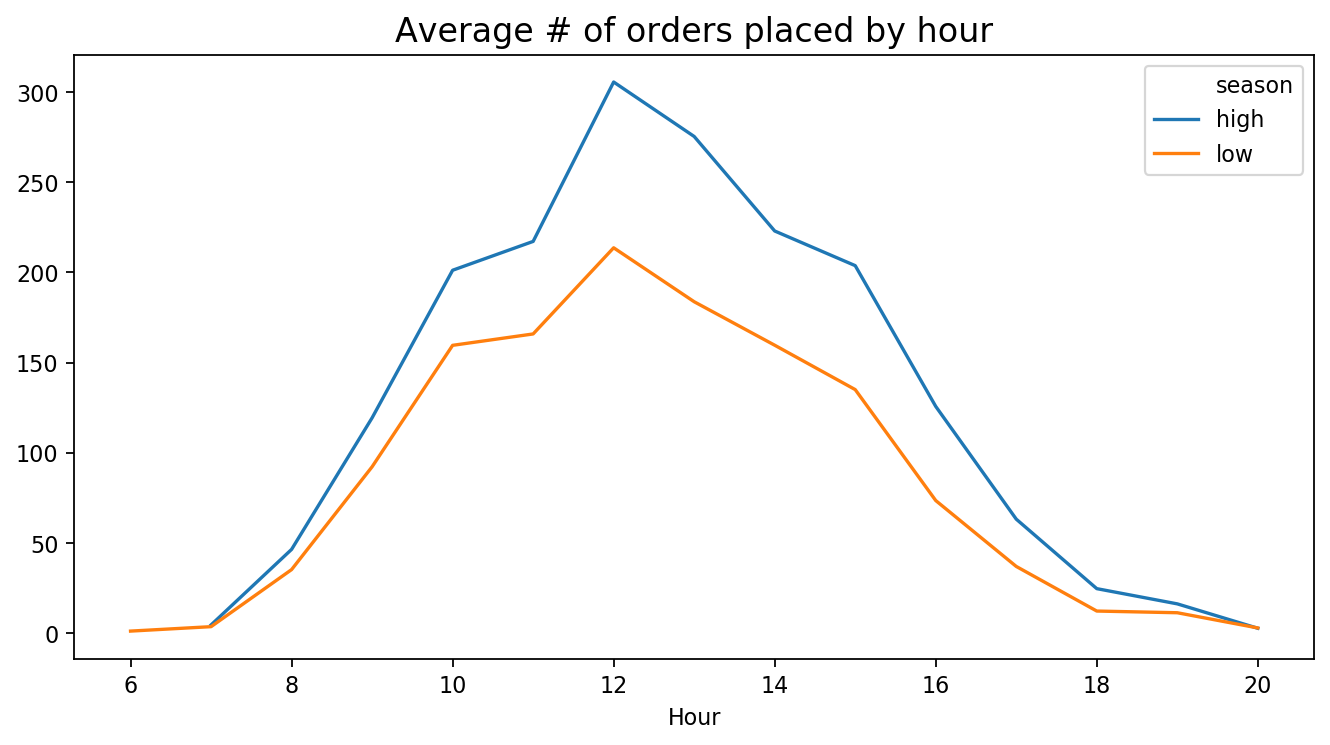

In [45]:
plt.figure(dpi=80, figsize=(10,5))

plt.title('Average # of orders placed by hour', fontsize=15)
sns.lineplot(data=avg_n_invoice_h, x='hour', y='avg_num', hue='season')
plt.xlabel('Hour')
plt.ylabel('');

Most purchases accrue during lunchtime no matter of what season is.

In [131]:
sales_per_week = (test.groupby(['season', test['InvoiceDate'].dt.weekday])['Total_order']
                  .sum().reset_index()
                  .rename(columns={'InvoiceDate': 'week_day'}))

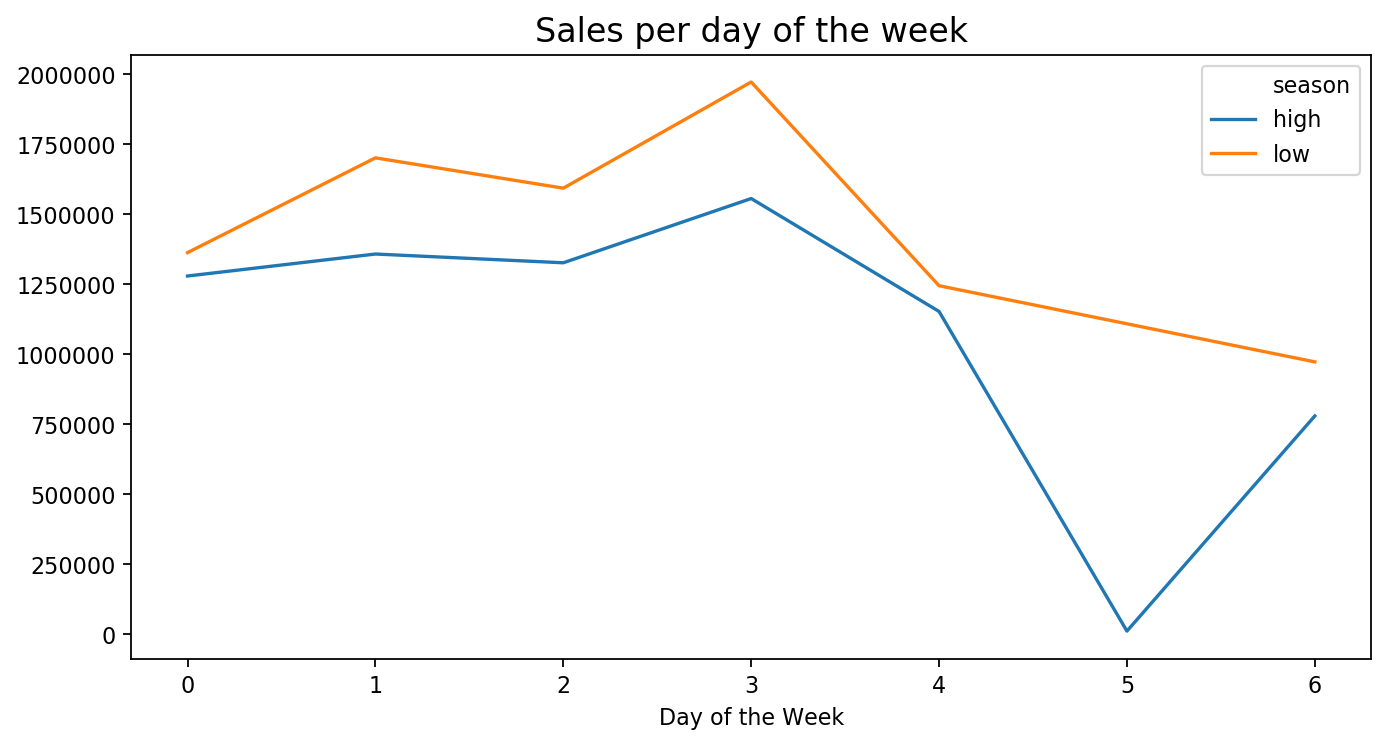

In [139]:
plt.figure(dpi=80, figsize=(10,5))

plt.title('Sales per day of the week', fontsize=15)
sns.lineplot(data=sales_per_week, x='week_day', y='Total_order', hue='season')
plt.xlabel('Day of the Week')
plt.ylabel('');

In [46]:
# check number of orders by customers

avg_orders = (df.groupby('Customer ID')
              .agg({'Invoice': 'nunique'})
              .rename(columns={'Invoice': 'n_orders'})
              .sort_values('n_orders', ascending=False)
              .reset_index())

In [57]:
repeat_customers = (round((avg_orders[avg_orders['n_orders'] > 1]['n_orders'].count() / avg_orders['n_orders'].count()) * 100,2))
print("Percent of customers placed order more than 1 time: ", repeat_customers, "%")

Percent of customers placed order more than 1 time:  72.35 %


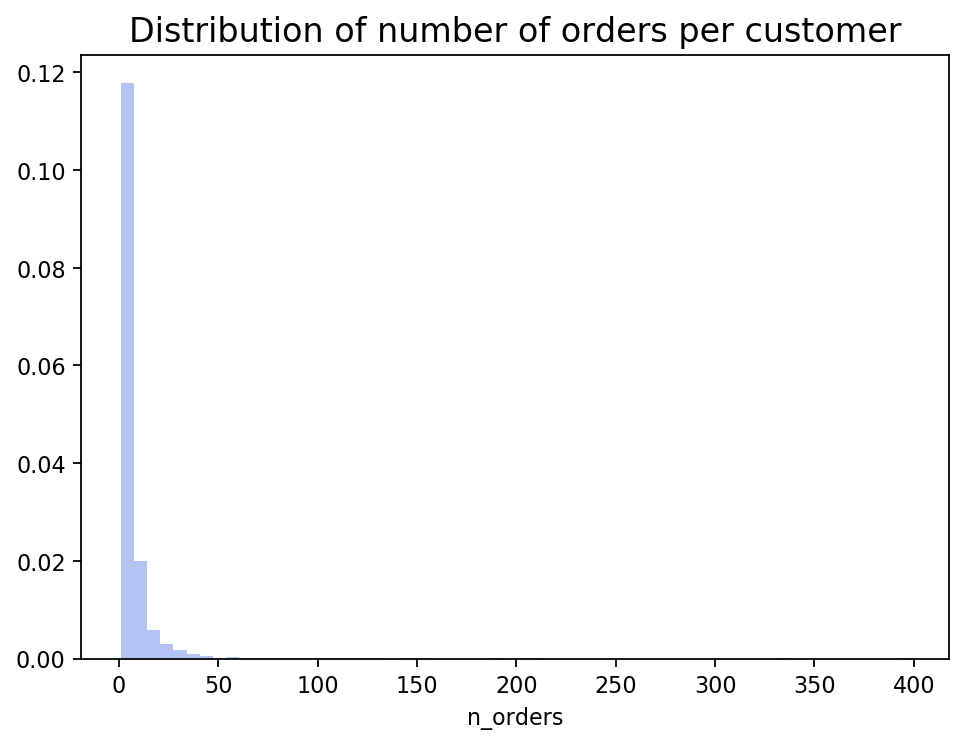

In [58]:
plt.figure(dpi=80, figsize=(7,5))
plt.title('Distribution of number of orders per customer', fontsize=15)
sns.distplot(avg_orders["n_orders"], bins=60, kde=False, norm_hist=True, color='royalblue');

**Cohort Analysis**

In [150]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [59]:
# Identify to which cohort customers belong by finding month of their first purchase

df['cohort'] = (df.groupby('Customer ID')['InvoiceDate'] 
                 .transform('min') 
                 .dt.to_period('M')) 

In [60]:
from operator import attrgetter

In [61]:
df_cohort = (df.groupby(['cohort', 'order_month']) 
              .agg(n_customers=('Customer ID', 'nunique')) 
              .reset_index(drop=False))
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [71]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [72]:
cohort_size = cohort_pivot.iloc[:,0]

In [73]:
cohort_matrix = cohort_pivot.divide(cohort_size, axis=0)

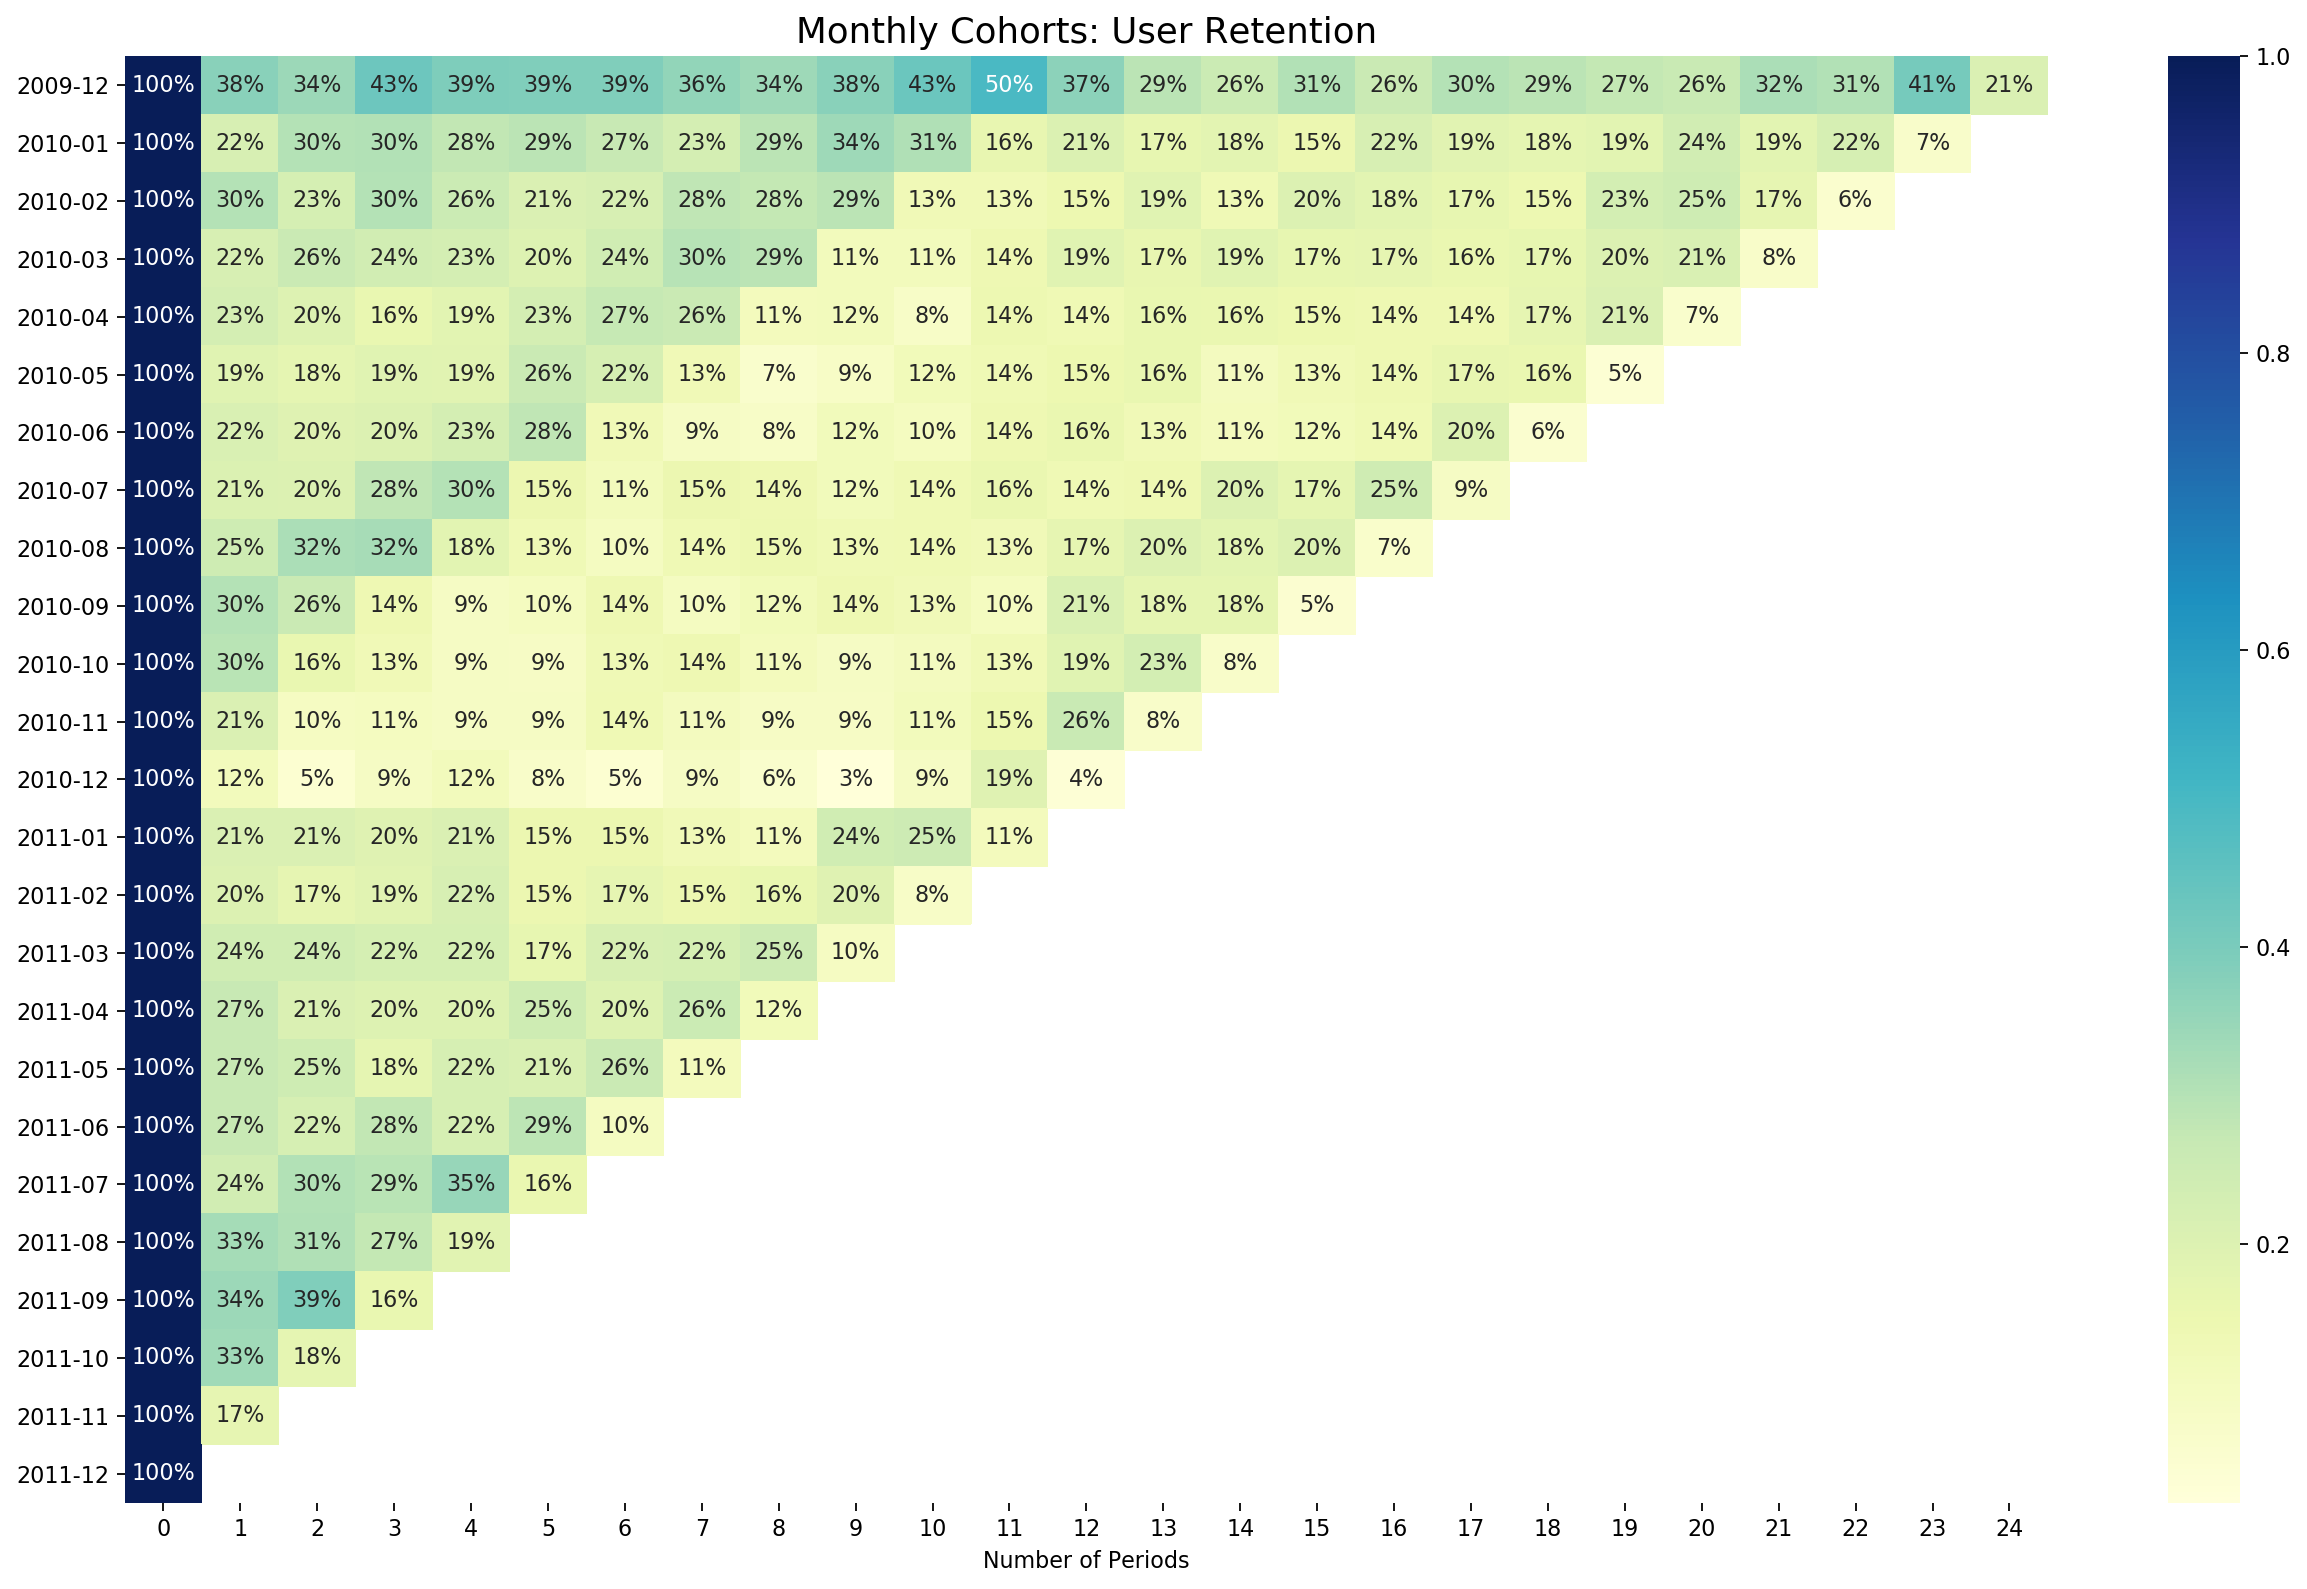

In [200]:
plt.figure(dpi=80, figsize=(16,10))
sns.heatmap(cohort_matrix, annot=True,
            fmt='.0%',
            cmap="YlGnBu");

plt.title('Monthly Cohorts: User Retention', fontsize=16)
plt.xlabel('Number of Periods')
plt.ylabel('')
plt.tight_layout();

The most loyal cohort is Dec 2009. And least loyal is Dec 2010.<br>
First month after the first purchase of each cohort drops on average to 25%